# Multi-objective Optimisation: Nobody Gets Exactly What They Want
### An introduction to Pareto optimality

In many real-world problems, several factors influence decision-making. Often, these factors compete with each other as they have their own  interests or "objective". In groundwater management, for example, 'meeting the demand' (i.e., maximising pumping at production wells) often competes with 'protecting the environment' (i.e., minimising drawdown at groundwater-dependent ecosystems). Decision-making should consider the trade-off between these competing objective in an attempt to make everyone happy. Of course, we cannot please everyone, so we have to find a set of decisions which is the best compromise between competing interests -- this is the central idea for Multi-Objective Optimisation (MOO).

This notebook is Part 1 of MOO Tutorials. Before we give you a walk-through on how to use MOO tools, we have to understand first the central concept in MOO, the Pareto optimality, which is just a fancy way of saying that in any decisions made, nobody is absolutely happy but we are all quite unhappy together, so yay!

For this tutorial, we will start with a modified Kursawe problem. 

In [1]:
import os
import shutil
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

Let us first see what the problem looks like. The original Kursawe problem has two objectives and three-dimensional inputs. For the purpose of this tutorial, we modified it such that we only have two-dimensional inputs for easier visualisation of the objective space.

The objective functions are given by:

In [4]:
def kursawe_2d(x):
    x = np.array(x)
    obj1 = -10 * np.exp(-0.2 * np.sqrt(x[0]**2 + x[1]**2))
    obj2 = np.abs(x[0])**0.8 + 5 * np.sin(x[0]**3) + np.abs(x[1])**0.8 + 5 * np.sin(x[1]**3)
    return obj1, obj2

Think of these objectives as two different interests that influence decision-making and x1 and x2 are levers we adjust to satisfy these objectives. Suppose we want both objectives minimized. If only they could agree on exactly the same values for x1 and x2, then we have a concensus.

Let's create an array of decision variable values and calculate the objective values to see how each objective looks like with respect to the decision space.

In [9]:
n_samples = 100

x1_range = np.linspace(-5, 5, int(np.sqrt(n_samples)))
x2_range = np.linspace(-5, 5, int(np.sqrt(n_samples)))
x1, x2 = np.meshgrid(x1_range, x2_range)
x1 = x1.flatten()
x2 = x2.flatten()

x1 = x1[:n_samples]
x2 = x2[:n_samples]

n_actual = min(len(x1), len(x2))
objectives = np.array([kursawe([x1[i], x2[i]]) for i in range(n_actual)])
obj1 = objectives[:, 0]
obj2 = objectives[:, 1]


Objective 1 Minimum:
  Value: -8.973565
  x1: 0.050505
  x2: 0.050505

Objective 2 Minimum:
  Value: -7.105523
  x1: 1.666667
  x2: 1.565657


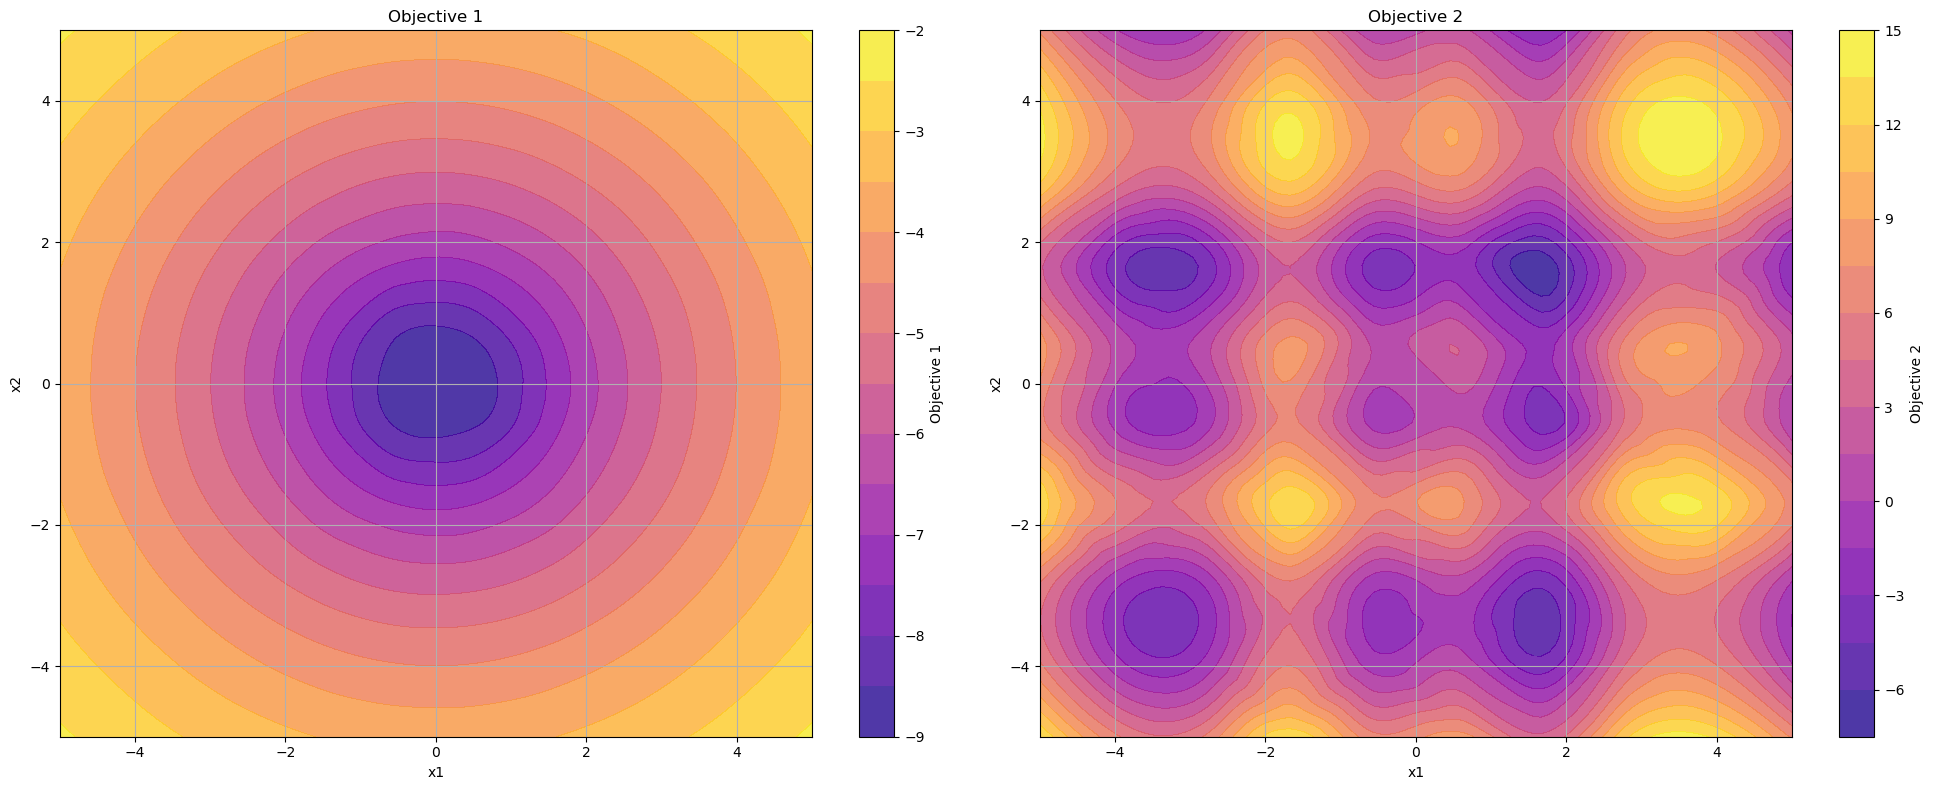

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

grid_size = 100
xi = np.linspace(min(x1), max(x1), grid_size)
yi = np.linspace(min(x2), max(x2), grid_size)
xi_grid, yi_grid = np.meshgrid(xi, yi)

zi1 = griddata((x1, x2), obj1, (xi_grid, yi_grid), method='cubic')
contour1 = ax1.contourf(xi_grid, yi_grid, zi1, 15, cmap='plasma', alpha=0.8)
fig.colorbar(contour1, ax=ax1, label='Objective 1')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('Objective 1')
ax1.grid(True)

zi2 = griddata((x1, x2), obj2, (xi_grid, yi_grid), method='cubic')
contour2 = ax2.contourf(xi_grid, yi_grid, zi2, 15, cmap='plasma', alpha=0.8)
fig.colorbar(contour2, ax=ax2, label='Objective 2')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Objective 2')
ax2.grid(True)

min_obj1_idx = np.nanargmin(zi1)
min_obj1_row, min_obj1_col = np.unravel_index(min_obj1_idx, zi1.shape)
min_obj1_x1 = xi_grid[min_obj1_row, min_obj1_col]
min_obj1_x2 = yi_grid[min_obj1_row, min_obj1_col]
min_obj1_value = zi1[min_obj1_row, min_obj1_col]

min_obj2_idx = np.nanargmin(zi2)
min_obj2_row, min_obj2_col = np.unravel_index(min_obj2_idx, zi2.shape)
min_obj2_x1 = xi_grid[min_obj2_row, min_obj2_col]
min_obj2_x2 = yi_grid[min_obj2_row, min_obj2_col]
min_obj2_value = zi2[min_obj2_row, min_obj2_col]

print("Objective 1 Minimum:")
print(f"  Value: {min_obj1_value:.6f}")
print(f"  x1: {min_obj1_x1:.6f}")
print(f"  x2: {min_obj1_x2:.6f}")
print("\nObjective 2 Minimum:")
print(f"  Value: {min_obj2_value:.6f}")
print(f"  x1: {min_obj2_x1:.6f}")
print(f"  x2: {min_obj2_x2:.6f}")

plt.tight_layout()
plt.show()

The minima for each objectives are at different locations in the decision space. That means we cannot find a single set of decision variables that can make both objectives minimized at the same time. Looks like we have to make a compromise, but how?

Let's have a look at the objective space below. Try to change the values of x1 and x2 to see how the objectives change.

In [16]:
from ipywidgets import interact, FloatSlider

def plot_objectives(x1_val, x2_val):
    # Calculate objectives for the given x1, x2 values using Kursawe function
    new_obj1 = -10 * np.exp(-0.2 * np.sqrt(x1_val**2 + x2_val**2))
    new_obj2 = abs(x1_val)**0.8 + 5 * np.sin(x1_val**3) + abs(x2_val)**0.8 + 5 * np.sin(x2_val**3)

    plt.figure(figsize=(7.5, 6))
    plt.scatter(obj1, obj2, alpha=0.3, label='solutions previously tried')

    plt.scatter(new_obj1, new_obj2, color='red', s=100, label=f'Selected (x1={x1_val:.2f}, x2={x2_val:.2f})')

    plt.xlabel('Objective 1 (minimise)')
    plt.ylabel('Objective 2 (minimise)')
    plt.xlim((-10, -2))
    plt.ylim((-7.5, 15))
    plt.title('Objective Space')
    plt.grid(True)
    plt.legend()

    plt.annotate(f'Obj1: {new_obj1:.4f}\nObj2: {new_obj2:.4f}', 
                 xy=(new_obj1, new_obj2), 
                 xytext=(10, 10),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
    
    plt.show()

interact(plot_objectives, 
         x1_val=FloatSlider(min=-5, max=5, step=0.1, value=0, description='x1:'),
         x2_val=FloatSlider(min=-5, max=5, step=0.1, value=0, description='x2:'))



interactive(children=(FloatSlider(value=0.0, description='x1:', max=5.0, min=-5.0), FloatSlider(value=0.0, des…

<function __main__.plot_objectives(x1_val, x2_val)>

Did you notice that the red dot cannot move all the way down to the bottom left corner of the plot (-10,-7.5)? Keep trying to move the red dot as close to this corner as possible. 

Did you notice that you can only move the red dot towards the bottom left corner up to a certain extent? There seemed to be an invisible barrier that prevents us from moving the red dot further down. That invisible barrier is called the "Pareto front". It is the set of points that represent the best trade-off between the two objectives. At any given value of one objective, we can only lower the value of the other objective up to the Pareto front, and vice versa. As decision-makers, we cannot provide absolute happiness for competing interests at the same time, but we can find a set of compromises that make us all relatively happy -- that set of compromises is called the "Pareto optimal set" of decisions. We want a robust collection of these decisions to provide some flexibility.

Can you try finding values for x1 and x2 along that barrier?

It is difficult and impractical to manually find a robust set of Pareto optimal decisions. Think about these objectives as outputs of a complex numerical model (e.g., groundwater model), which runs hours to evaluate a set of decision inputs (imagine having more than two values to adjust!) and determine the values of the objectives. It will take forever to manually obtain these Pareto optimal decision sets.

The good news is we have decision-support tools to help us with this task. In the next part of this tutorial, we will show a walk through of PESTPP-MOU, which is one of the tools in the PEST++ suite designed for this purpose.